In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임워크 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

# 결측치 생성 
data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


### ARIMA 모델 활용하여 결측치 예측과 대처 실습

In [3]:
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
# order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. 
# order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 
# 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.
model_fit = model.fit()

# 결측치 예측 
predicted_values = model_fit.predict(start=50, end=2000)
print(predicted_values)

# 결측치 대처 
data.loc[50:150, 'value temp'] = predicted_values
print(data[50:150])

C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


50     -0.235546
51     -0.210555
52     -0.226195
53     -0.211667
54     -0.201916
          ...   
1996    0.029276
1997    0.029276
1998    0.029276
1999    0.029276
2000    0.029276
Name: predicted_mean, Length: 1951, dtype: float64
          Date  Value  value temp
50  2023-02-20    NaN   -0.235546
51  2023-02-21    NaN   -0.210555
52  2023-02-22    NaN   -0.226195
53  2023-02-23    NaN   -0.211667
54  2023-02-24    NaN   -0.201916
..         ...    ...         ...
145 2023-05-26    NaN   -0.007444
146 2023-05-27    NaN   -0.011588
147 2023-05-28    NaN   -0.017153
148 2023-05-29    NaN    0.010595
149 2023-05-30    NaN    0.004525

[100 rows x 3 columns]


C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


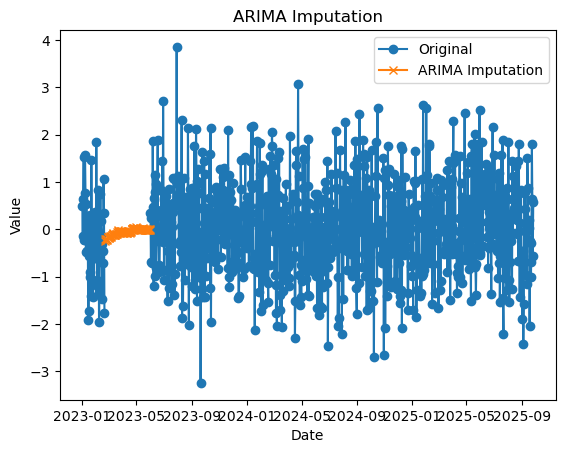

In [4]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()